In [15]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [16]:
df= pd.read_csv('HousingNew.csv')

In [17]:
df

,ID,price,lotsize,bedrooms,bathrms,stories,garagepl,recroom,fullbase,airco
0,1,42000.0,5850,3,1,2,1,no,yes,no
1,2,38500.0,4000,2,1,1,0,no,no,no
2,3,49500.0,3060,3,1,1,0,no,no,no
3,4,60500.0,6650,3,1,2,0,yes,no,no
4,5,61000.0,6360,2,1,1,0,no,no,no
...,...,...,...,...,...,...,...,...,...,...
541,542,91500.0,4800,3,2,4,0,yes,no,yes
542,543,94000.0,6000,3,2,4,0,no,no,yes
543,544,103000.0,6000,3,2,4,1,yes,no,yes
544,545,105000.0,6000,3,2,2,1,yes,no,yes


# Cleaning

In [32]:
clean_df = df.drop_duplicates()
clean_df.dropna()
clean_df

,ID,price,lotsize,bedrooms,bathrms,stories,garagepl,recroom,fullbase,airco
0,1,42000.0,5850,3,1,2,1,no,yes,no
1,2,38500.0,4000,2,1,1,0,no,no,no
2,3,49500.0,3060,3,1,1,0,no,no,no
3,4,60500.0,6650,3,1,2,0,yes,no,no
4,5,61000.0,6360,2,1,1,0,no,no,no
...,...,...,...,...,...,...,...,...,...,...
541,542,91500.0,4800,3,2,4,0,yes,no,yes
542,543,94000.0,6000,3,2,4,0,no,no,yes
543,544,103000.0,6000,3,2,4,1,yes,no,yes
544,545,105000.0,6000,3,2,2,1,yes,no,yes


In [64]:
clean_df.corr()

,ID,price,lotsize,bedrooms,bathrms,stories,garagepl
ID,1.000000,0.376007,0.374338,0.114219,0.108395,0.231427,0.125326
price,0.376007,1.000000,0.535796,0.366447,0.516719,0.421190,0.383302
lotsize,0.374338,0.535796,1.000000,0.151851,0.193833,0.083675,0.352872
bedrooms,0.114219,0.366447,0.151851,1.000000,0.373769,0.407974,0.139117
bathrms,0.108395,0.516719,0.193833,0.373769,1.000000,0.324066,0.178178
stories,0.231427,0.421190,0.083675,0.407974,0.324066,1.000000,0.043412
garagepl,0.125326,0.383302,0.352872,0.139117,0.178178,0.043412,1.000000


<AxesSubplot:xlabel='bathrms'>

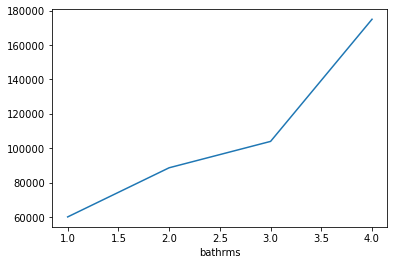

In [59]:
clean_df.groupby('bathrms').price.mean().plot()

<AxesSubplot:xlabel='bathrms'>

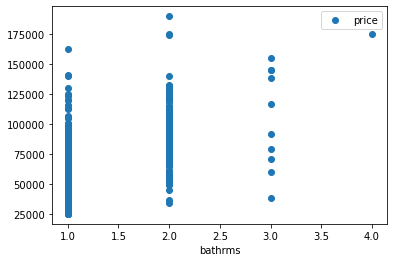

In [60]:
clean_df.plot(x='bathrms', y='price', style='o')

<AxesSubplot:xlabel='bedrooms'>

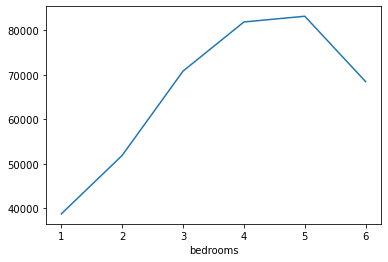

In [42]:
clean_df.groupby('bedrooms').price.mean().plot()

<AxesSubplot:xlabel='bedrooms'>

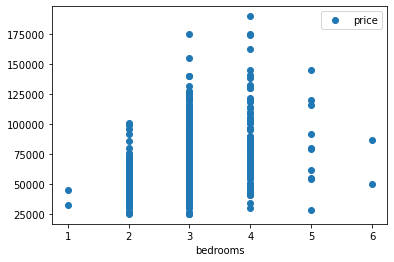

In [45]:
clean_df.plot(x='bedrooms', y='price', style='o')

<AxesSubplot:xlabel='stories'>

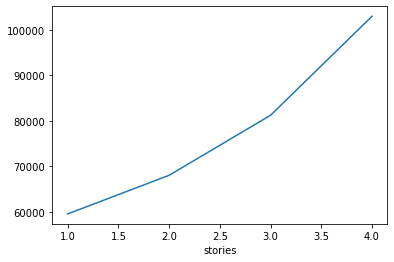

In [43]:
clean_df.groupby('stories').price.mean().plot()

<AxesSubplot:xlabel='stories'>

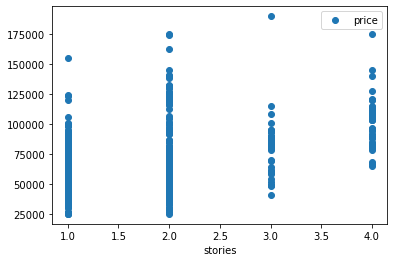

In [46]:
clean_df.plot(x='stories', y='price', style='o')

In [61]:
xy = clean_df[ {'bathrms', 'price'} ]

In [62]:
from sklearn import linear_model

In [63]:
reg = linear_model.LinearRegression()
reg.fit(xy.bathrms, xy.price)

ValueError: Expected 2D array, got 1D array instead:
array=[1 1 1 1 1 1 2 1 1 2 2 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 2 1 1 1 3 1 1 1 1 1 1 2 1 1 1 3 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 2 1 2 1 1 1 1 1 1 2 3 1 2 2 1 1 2 2 1 1
 1 1 1 2 1 1 2 2 1 1 2 1 1 1 2 3 2 2 2 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 2
 2 1 1 1 2 1 1 3 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1
 1 2 1 2 1 1 1 2 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 3 2 1
 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 2 1 2 2 1 1 1 1 1 1 2 2 1 2 2 1 2 2 1 2 4 1
 1 1 1 2 3 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 2 1 1 2 2 1 2 3 2 1 1 1 2 2 3 2
 1 1 2 2 2 2 2 2 1 2 2 1 1 1 2 1 1 1 1 1 1 2 1 2 1 1 2 2 1 1 1 1 1 1 2 2 1
 1 2 2 1 2 2 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1
 1 1 2 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 2 1 2 1 2 2 1 1
 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 2 2
 2 2 2 2 2 2 2 2 2 1 2 2 1 1 1 1 1 2 2 1 2 2 2 2 2 2 2 1].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.